**Estudiante**: Mateo Murcia Valles

*1122652631*


## üìÑ Introducci√≥n

Para esta pr√°ctica he elegido trabajar con el dataset **"Country Data"**, que contiene informaci√≥n sobre distintos pa√≠ses a partir de variables econ√≥micas y sociales, como el PIB per c√°pita, expectativa de vida, gasto en salud, mortalidad infantil, entre otros. Este tipo de datos es interesante porque permite analizar y comparar pa√≠ses seg√∫n su nivel de desarrollo y sus condiciones socioecon√≥micas.

El prop√≥sito de esta primera parte es preparar correctamente la informaci√≥n para que pueda ser utilizada en los algoritmos de clustering. Esto incluye revisar si hay *datos faltantes*, *transformar* las variables que sea necesario y escalar los datos para que todas las variables tengan un peso similar durante el an√°lisis.

Este conjunto de datos es bastante adecuado para este tipo de ejercicio, ya que es muy probable que pa√≠ses con caracter√≠sticas similares terminen agrup√°ndose de forma natural, lo que nos permitir√° evaluar de forma m√°s clara el desempe√±o de los m√©todos de agrupamiento.


In [1]:
# librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA


## Paso 1: Descarga y carga de datos

Vamos a descargar un conjunto de datos desde Kaggle utilizando la librer√≠a `kagglehub`, la cual nos permite obtener de forma directa y actualizada los archivos necesarios para nuestro an√°lisis. Una vez descargado, identificaremos la ruta local donde se almacenaron los datos y, a partir de all√≠, cargaremos el archivo principal (en formato `.csv`) usando la funci√≥n `read_csv()` de la librer√≠a `pandas`. Esto nos permitir√° trabajar con la base de datos en un DataFrame y comenzar con la exploraci√≥n y an√°lisis de los datos.


In [2]:
import pandas as pd
import kagglehub


path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")
print("Path to dataset files:", path)


df = pd.read_csv(path + "/Country-data.csv")
print(df.head())


c:\Users\1\Documents\Estad√≠stica\2025_1\cursos_posgrado\aprendizaje_maquinas\practica3\clustering_country_data\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\1\.cache\kagglehub\datasets\rohan0301\unsupervised-learning-on-country-data\versions\2
               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  


## Informaci√≥n general y b√∫squeda de datos faltantes

In [3]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Histograma para ver la distribuci√≥n de las variables

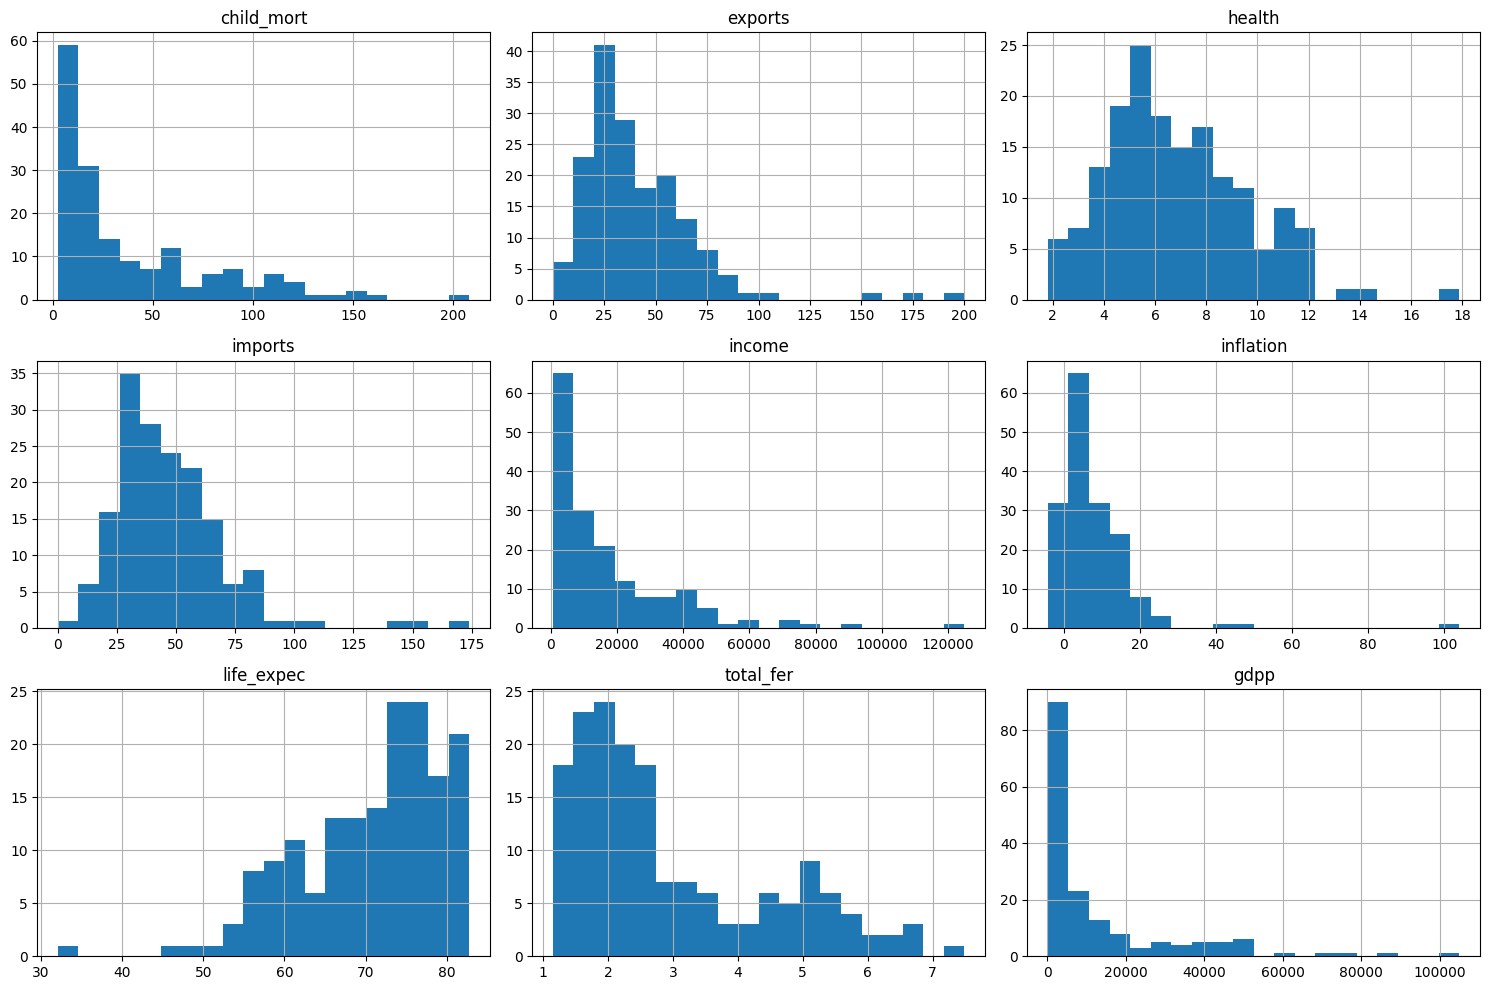

In [4]:
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()


## Paso 2: Eliminaci√≥n de datos nulos

Al revisar el conjunto de datos, verificamos que **no existen valores nulos** en ninguna de las columnas. Esto significa que no es necesario eliminar filas ni columnas por esta raz√≥n y podemos continuar con el preprocesamiento normalmente.

Adem√°s, observamos que la columna `country` contiene el nombre del pa√≠s en formato de texto. Esta columna es un **identificador** y no representa una caracter√≠stica cuantitativa que pueda aportar al proceso de agrupamiento (clustering). Dado que los algoritmos de clustering se basan en distancias num√©ricas, esta columna no es √∫til para el an√°lisis y debe ser eliminada antes de continuar.

Por lo tanto, en el siguiente paso vamos a eliminar la columna `country` y normalizar todas las variables num√©ricas para asegurar que est√©n en una misma escala, requisito necesario para aplicar correctamente los m√©todos de agrupamiento.


In [5]:
df = df.drop(columns=['country'])

## Normalicemos

In [6]:
df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()


child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274    0.670423   
3    2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   -1.179234   
4   -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749    0.704258   

   total_fer      gdpp  
0   1.902882 -0.679180  
1  -0.859973 -0.485623  
2  -0.038404 -0.465376  
3   2.128151 -0.516268  
4  -0.541946 -0.041817

In [8]:
df_scaled.describe()

child_mort       exports        health       imports        income  \
count  1.670000e+02  1.670000e+02  1.670000e+02  1.670000e+02  1.670000e+02   
mean  -3.722904e-17  2.127373e-16  5.504579e-16  2.765585e-16 -7.977650e-17   
std    1.003008e+00  1.003008e+00  1.003008e+00  1.003008e+00  1.003008e+00   
min   -8.871383e-01 -1.500192e+00 -1.827827e+00 -1.939940e+00 -8.603259e-01   
25%   -7.466190e-01 -6.333367e-01 -6.922106e-01 -6.914785e-01 -7.174558e-01   
50%   -4.717981e-01 -2.235279e-01 -1.810007e-01 -1.487432e-01 -3.738080e-01   
75%    5.926666e-01  3.747198e-01  6.515412e-01  4.913530e-01  2.942370e-01   
max    4.221297e+00  5.813835e+00  4.047436e+00  5.266181e+00  5.611542e+00   

          inflation    life_expec     total_fer          gdpp  
count  1.670000e+02  1.670000e+02  1.670000e+02  1.670000e+02  
mean  -1.063687e-17  3.696311e-16  3.044803e-16  5.850277e-17  
std    1.003008e+00  1.003008e+00  1.003008e+00  1.003008e+00  
min   -1.137852e+00 -4.337186e+00 -1.191250e+00 -6.968005e-01  
25%   -5.666409e-01 -5.927576e-01 -7.639023e-01 -6.366596e-01  
50%   -2.269504e-01  2.869576e-01 -3.564309e-01 -4.544309e-01  
75%    2.816364e-01  7.042584e-01  6.175252e-01  5.942100e-02  
max    9.129718e+00  1.380962e+00  3.009349e+00  5.036507e+00

In [9]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    float64
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    float64
dtypes: float64(9)
memory usage: 11.9 KB


<Axes: >

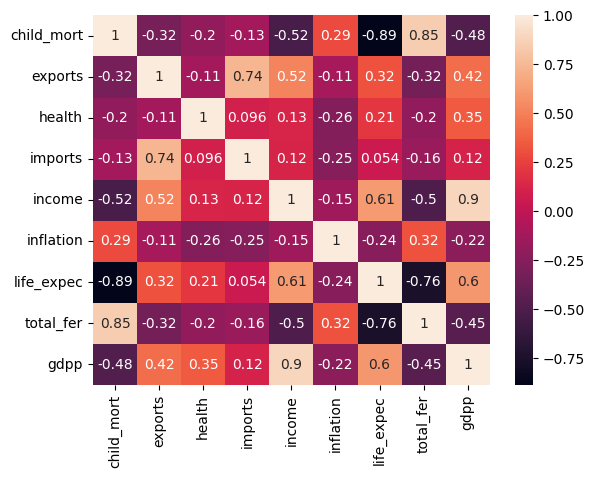

In [10]:
#correlacion
corr_matrix=df_scaled.corr()
sns.heatmap(corr_matrix,annot=True)

### Matriz de correlaciones (incluyendo `cluster`)

La matriz de correlaciones muestra la relaci√≥n lineal entre cada par de variables y, en la √∫ltima fila/columna, su correlaci√≥n con la etiqueta `cluster`. Los colores claros indican **correlaciones positivas fuertes** (hasta +1), y los oscuros, **negativas** (hasta ‚Äì1). Por ejemplo, `income` y `gdpp` tienen correlaci√≥n muy alta (~ 0.90), lo que confirma que ambos reflejan el nivel de riqueza del pa√≠s; `child_mort` y `life_expec` est√°n fuertemente inversamente correlacionados (~ ‚Äì0.89), indicando que a mayor mortalidad infantil, menor esperanza de vida. La correlaci√≥n entre `cluster` y las variables nos dice qu√© tan determinante fue cada una para la formaci√≥n de grupos: destaca `child_mort` (‚Äì0.58) y `total_fer` (0.56) como principales motores del agrupamiento, seguido de `life_expec` (‚Äì0.43) y `inflation` (0.14), mientras que variables como `exports` o `health` tuvieron menor influencia directa en la separaci√≥n de clusters. Esta visi√≥n nos ayuda a entender las variables que m√°s contribuyen a diferenciar los grupos identificados con KMeans.  


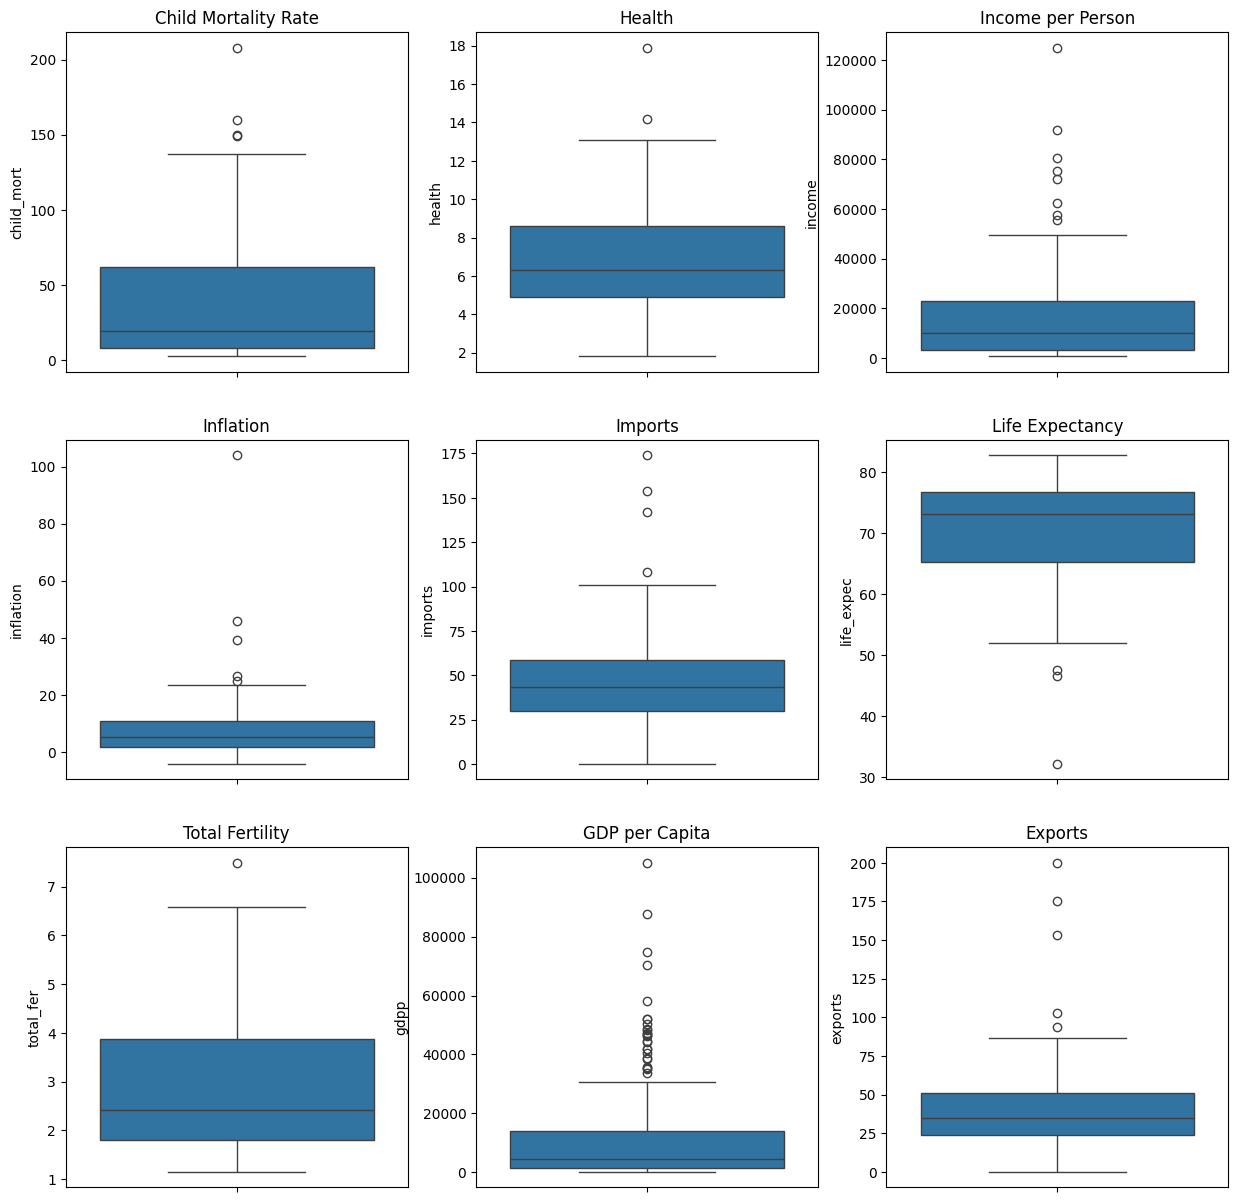

In [11]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
bp=sns.boxplot(y=df.child_mort,ax=ax[0, 0])
ax[0, 0].set_title('Child Mortality Rate')
bp=sns.boxplot(y=df.health,ax=ax[0, 1])
ax[0, 1].set_title('Health')
bp=sns.boxplot(y=df.income,ax=ax[0, 2])
ax[0,2].set_title('Income per Person')
bp=sns.boxplot(y=df.inflation,ax=ax[1, 0])
ax[1,0].set_title('Inflation')
bp=sns.boxplot(y=df.imports,ax=ax[1,1])
ax[1, 1].set_title('Imports')
s=sns.boxplot(y=df.life_expec,ax=ax[1, 2])
ax[1,2].set_title('Life Expectancy')
s=sns.boxplot(y=df.total_fer,ax=ax[2,0])
ax[2,0].set_title('Total Fertility')
s=sns.boxplot(y=df.gdpp,ax=ax[2, 1])
ax[2,1].set_title('GDP per Capita')
s=sns.boxplot(y=df.exports,ax=ax[2,2])
ax[2,2].set_title('Exports')
plt.show()

Este bloque de c√≥digo genera una cuadr√≠cula de 3√ó3 **boxplots** para cada variable del dataset, lo que nos permite visualizar de un vistazo la mediana, los cuartiles, los posibles *outliers* y el rango de cada caracter√≠stica; esta informaci√≥n es fundamental para detectar valores at√≠picos que puedan sesgar el clustering y para decidir si es necesario aplicar transformaciones adicionales, como winsorizaci√≥n o un escalado distinto, antes de entrenar los modelos de agrupamiento.  


## Variables que utilizaremos para el agrupamiento

Las siguientes variables representan caracter√≠sticas num√©ricas reales que describen las diferencias socioecon√≥micas, demogr√°ficas y de salud entre los pa√≠ses. Estas variables son relevantes para los m√©todos de agrupamiento, ya que permiten medir similitudes y diferencias mediante distancias en el espacio multidimensional.

- **`child_mort`:** Tasa de mortalidad infantil (muertes por cada 1000 nacidos vivos).
- **`exports`:** Porcentaje del PIB correspondiente a exportaciones.
- **`health`:** Porcentaje del PIB destinado al gasto en salud.
- **`imports`:** Porcentaje del PIB correspondiente a importaciones.
- **`income`:** Ingreso per c√°pita.
- **`inflation`:** Inflaci√≥n anual promedio (%).
- **`life_expec`:** Esperanza de vida promedio.
- **`total_fer`:** Tasa total de fertilidad (n√∫mero de hijos por mujer).
- **`gdpp`:** PIB per c√°pita.

# KMeans: evaluaci√≥n de k usando Codo, Davies‚ÄìBouldin e √çndice de Silueta

Evaluaremos distintos valores de **k** (de 2 a 15) con tres m√©tricas:

- **Inercia (M√©todo del Codo):** suma de distancias al centroide; buscamos el "codo".  
- **√çndice de Davies‚ÄìBouldin:** relaci√≥n entre dispersi√≥n intra‚Äìcluster y separaci√≥n inter‚Äìcluster; **menor es mejor**.  
- **√çndice de Silueta:** medida de cu√°n cerca est√° cada punto de su propio cluster comparado con el m√°s cercano; **mayor es mejor**.  

Con este enfoque m√∫ltiple tendremos una visi√≥n m√°s completa para elegir el n√∫mero √≥ptimo de clusters.


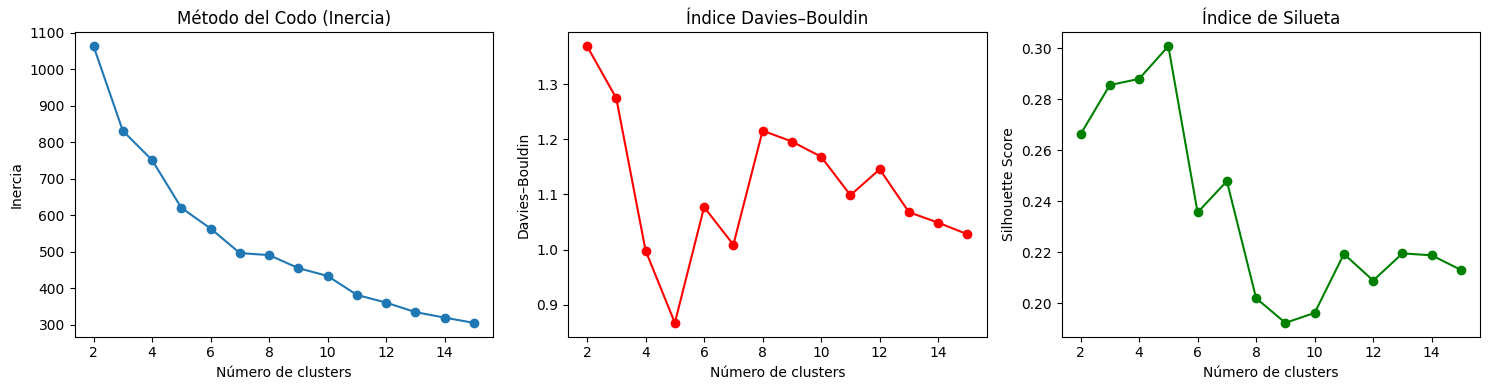

El valor √≥ptimo de k seg√∫n el √≠ndice de silueta es: 5


In [12]:
# 1. Importar librer√≠as
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score

#Rango de clusters a probar
range_n_clusters = list(range(2, 16))
inertias = []
db_indices = []
silhouette_scores = []

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)

    inertias.append(kmeans.inertia_)
    db_indices.append(davies_bouldin_score(df_scaled, labels))
    silhouette_scores.append(silhouette_score(df_scaled, labels))

# grafiquemos
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(range_n_clusters, inertias, marker='o')
plt.title('M√©todo del Codo (Inercia)')
plt.xlabel('N√∫mero de clusters')
plt.ylabel('Inercia')

plt.subplot(1, 3, 2)
plt.plot(range_n_clusters, db_indices, marker='o', color='r')
plt.title('√çndice Davies‚ÄìBouldin')
plt.xlabel('N√∫mero de clusters')
plt.ylabel('Davies‚ÄìBouldin')

plt.subplot(1, 3, 3)
plt.plot(range_n_clusters, silhouette_scores, marker='o', color='g')
plt.title('√çndice de Silueta')
plt.xlabel('N√∫mero de clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# 5. Selecci√≥n del mejor k seg√∫n Silhouette
best_k = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f"El valor √≥ptimo de k seg√∫n el √≠ndice de silueta es: {best_k}")


### ¬øC√≥mo escoger el n√∫mero de clusters (k) seg√∫n cada m√©todo?

Al evaluar diferentes valores de **k** con los tres criterios, aplicamos estas reglas:

1. **M√©todo del Codo (Inercia)**  
   - Se grafica la **inercia** (suma de distancias al centroide) frente a k.  
   - Buscamos el ‚Äúcodo‚Äù: el punto donde la pendiente de la curva se hace mucho menos pronunciada.  
   - En nuestro gr√°fico, ese codo aparece alrededor de **k = 5** √≥ **k = 7**.

2. **√çndice de Davies‚ÄìBouldin**  
   - Mide la relaci√≥n entre dispersi√≥n _intra_-cluster y separaci√≥n _inter_-cluster.  
   - **Valores m√°s bajos** indican mejor calidad de separaci√≥n.  
   - El m√≠nimo se alcanza en **k = 5**.

3. **√çndice de Silueta**  
   - Compara la distancia media de cada punto a su propio cluster vs. al m√°s cercano.  
   - **Valores m√°s altos** significan clusters m√°s definidos.  
   - En nuestro caso, el m√°ximo est√° en **k = 5**.

> **Conclusi√≥n:**  
> Usaremos **k = 5** ya que es el que nos indica el *√çndice Silueta* y el *Davies-Bouldin*


In [13]:
from sklearn.cluster import KMeans

kmeans_final = KMeans(n_clusters=5, random_state=42)
labels = kmeans_final.fit_predict(df_scaled)

# 2. A√±adir la etiqueta de cluster al DataFrame escalado y al original
df_scaled['cluster'] = labels
df['cluster'] = labels

# 3. Ver el tama√±o de cada cluster
print("Tama√±o de cada cluster:")
print(df['cluster'].value_counts().sort_index())

# 4. Calcular los centroides en la escala original
centroids_scaled = kmeans_final.cluster_centers_
centroids_original = scaler.inverse_transform(centroids_scaled)
centroids_df = pd.DataFrame(centroids_original, columns=df.columns[:-1]).round(2)
centroids_df.index.name = 'cluster'
print("\nCentroides (valores originales):")
print(centroids_df)


Tama√±o de cada cluster:
cluster
0    87
1    32
2    44
3     1
4     3
Name: count, dtype: int64

Centroides (valores originales):
         child_mort  exports  health  imports    income  inflation  \
cluster                                                              
0             22.22    41.08    6.25    47.80  12678.97       7.73   
1              5.18    46.12    9.09    40.58  44021.88       2.51   
2             94.31    28.68    6.33    42.87   3503.25       9.90   
3            130.00    25.30    5.07    17.40   5150.00     104.00   
4              4.13   176.00    6.79   156.67  64033.33       2.47   

         life_expec  total_fer      gdpp  
cluster                                   
0             72.63       2.33   6494.39  
1             80.08       1.79  42118.75  
2             59.02       5.05   1753.91  
3             60.50       5.84   2330.00  
4             81.43       1.38  57566.67  


A partir del ajuste de **KMeans (k = 5)** obtuvimos:

| Cluster | Tama√±o | Caracter√≠sticas principales (centroides)                                   |
|:-------:|-------:|----------------------------------------------------------------------------|
| 0       |     87 | Nivel medio de mortalidad infantil, PIB per c√°pita ~12‚ÄØ679, esperanza de vida ~72.6 a√±os. Pa√≠ses con indicadores socioecon√≥micos intermedios. |
| 1       |     32 | Baja mortalidad infantil (~5), alto PIB per c√°pita (~42‚ÄØ119) y esperanza de vida alta (~80 a√±os). Econom√≠as m√°s desarrolladas. |
| 2       |     44 | Mortalidad infantil alta (~94), PIB per c√°pita bajo (~3‚ÄØ503), esperanza de vida baja (~59 a√±os). Pa√≠ses en desarrollo con retos sanitarios. |
| 3       |      1 | Caso extremo: mortalidad infantil muy alta (130), inflaci√≥n muy elevada (104‚ÄØ%), PIB per c√°pita ~5‚ÄØ150. Outlier que requiere an√°lisis individual. |
| 4       |      3 | Muy altas exportaciones e importaciones relativas al PIB, PIB per c√°pita alto (~64‚ÄØ033) y esperanza de vida ~81 a√±os. Econom√≠as muy abiertas y desarrolladas. |

  
- **Cluster 1 y 4** agrupan las econom√≠as m√°s s√≥lidas y globalizadas (alto ingreso, baja mortalidad, gran apertura comercial).  
- **Cluster 0** re√∫ne pa√≠ses de ingreso y desarrollo medio.  
- **Cluster 2** corresponde a pa√≠ses con mayores desaf√≠os de salud y bajos ingresos.  
- **Cluster 3** es un caso aislado con condiciones extremas (podr√≠a corresponder a un pa√≠s con crisis muy aguda).


### Conteo de pa√≠ses por categor√≠a de desarrollo

Bas√°ndonos en la interpretaci√≥n de los centroides de cada cluster, definimos:

- **Cluster 2:** pa√≠ses subdesarrollados (high child_mort, low gdpp).  
- **Cluster 0:** pa√≠ses en desarrollo (indicadores intermedios).  
- **Clusters 1 y 4:** pa√≠ses desarrollados (high gdpp, low child_mort, alta apertura comercial).  
- **Cluster 3:** caso aislado (outlier extremo).

A continuaci√≥n contamos cu√°ntos pa√≠ses hay en cada categor√≠a y listamos sus nombres.


In [14]:
import pandas as pd


df_orig = pd.read_csv(path + "/Country-data.csv")


df_orig['cluster'] = labels


subdeveloped = df_orig[df_orig['cluster'] == 2]['country']
developing   = df_orig[df_orig['cluster'] == 0]['country']
developed    = df_orig[df_orig['cluster'].isin([1, 4])]['country']
outlier      = df_orig[df_orig['cluster'] == 3]['country']

# 4. Mostrar conteos
print(f"Subdesarrollados (Cluster¬†2): {len(subdeveloped)} pa√≠ses")
print(f"En desarrollo   (Cluster¬†0): {len(developing)} pa√≠ses")
print(f"Desarrollados    (Clusters¬†1 &¬†4): {len(developed)} pa√≠ses")
print(f"Outlier      (Cluster¬†3): {len(outlier)} pa√≠ses\n")

# 5. Listar nombres de pa√≠ses en cada categor√≠a
print("Pa√≠ses subdesarrollados:\n", subdeveloped.values, "\n")
print("Pa√≠ses en desarrolo:\n",   developing.values,   "\n")
print("Pa√≠ses desarrollados:\n",    developed.values,    "\n")
print("Outlier country:\n",        outlier.values,      "\n")


Subdesarrollados (Cluster¬†2): 44 pa√≠ses
En desarrollo   (Cluster¬†0): 87 pa√≠ses
Desarrollados    (Clusters¬†1 &¬†4): 35 pa√≠ses
Outlier      (Cluster¬†3): 1 pa√≠ses

Pa√≠ses subdesarrollados:
 ['Afghanistan' 'Angola' 'Benin' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Equatorial Guinea' 'Eritrea' 'Gabon'
 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Haiti' 'Kenya' 'Kiribati'
 'Lao' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali' 'Mauritania'
 'Mozambique' 'Namibia' 'Niger' 'Pakistan' 'Rwanda' 'Senegal'
 'Sierra Leone' 'South Africa' 'Sudan' 'Tanzania' 'Timor-Leste' 'Togo'
 'Uganda' 'Yemen' 'Zambia'] 

Pa√≠ses en desarrolo:
 ['Albania' 'Algeria' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belize'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Bulgaria' 'Cambodia' 'Cape Verde' 'Chile' 'China' 'Colombia'
 'Costa Rica' 'Cro

# Clustering Aglomerativo

En esta secci√≥n evaluaremos combinaciones de **tipo de enlace** (`single`, `complete`, `average`, `ward`) y **n√∫mero de clusters** (k de 2 a 10), usando el **√≠ndice de silueta** para determinar la mejor configuraci√≥n. Con esto podremos identificar tanto el m√©todo de enlace como el k que maximiza la cohesi√≥n interna y la separaci√≥n entre clusters.


In [15]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import pandas as pd

# Definir m√©todos de enlace y rango de clusters
linkages = ['single', 'complete', 'average', 'ward']
range_n_clusters = list(range(2, 11))


results = []

for linkage in linkages:
    for k in range_n_clusters:
        if linkage == 'ward':
            model = AgglomerativeClustering(n_clusters=k, linkage=linkage)
        else:
            model = AgglomerativeClustering(n_clusters=k, linkage=linkage)

        labels = model.fit_predict(df_scaled)
        score = silhouette_score(df_scaled, labels)
        results.append({'linkage': linkage, 'k': k, 'silhouette': score})

df_results = pd.DataFrame(results)

# 4. Mostrar las mejores configuraciones por enlace
best_per_linkage = df_results.loc[df_results.groupby('linkage')['silhouette'].idxmax()]
print("Mejor configuraci√≥n por enlace:")
print(best_per_linkage)

# 5. Seleccionar la mejor configuraci√≥n global
best_global = df_results.loc[df_results['silhouette'].idxmax()]
print("\nMejor configuraci√≥n global:")
print(best_global)


Mejor configuraci√≥n por enlace:
     linkage  k  silhouette
18   average  2    0.619473
9   complete  2    0.619473
0     single  2    0.619473
27      ward  2    0.365264

Mejor configuraci√≥n global:
linkage         single
k                    2
silhouette    0.619473
Name: 0, dtype: object


### Dendrograma

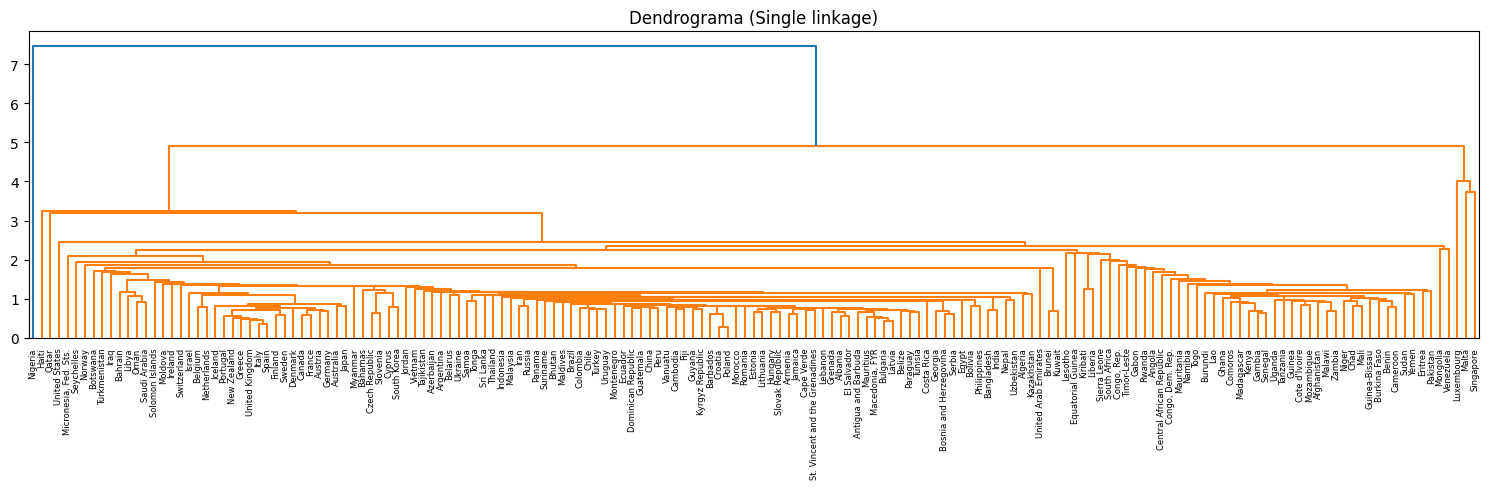

In [16]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

labels = df_orig['country'].values

Z = shc.linkage(df_scaled, method='single')

plt.figure(figsize=(15, 5))
plt.title('Dendrograma (Single linkage)')
shc.dendrogram(
    Z,
    labels=labels,
    leaf_rotation=90,
    leaf_font_size=6,
)
plt.tight_layout()
plt.show()


## Ajuste final de Clustering Aglomerativo con enlace `single` y k = 2

Seg√∫n la evaluaci√≥n con el √≠ndice de silueta, la mejor configuraci√≥n global es **linkage = single** y **n_clusters = 2** (silhouette ‚âà 0.62). Ahora ajustamos el modelo con estos par√°metros, asignamos cada pa√≠s a uno de los dos clusters y examinamos:

1. El **tama√±o** de cada cluster.  
2. Las **medias de cada variable** en escala original para caracterizar ambos grupos.


In [17]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=2, linkage='single')
agg_labels = agglo.fit_predict(df_scaled)

df['agg_cluster'] = agg_labels

print("Tama√±o de cada cluster (aglomerativo):")
print(df['agg_cluster'].value_counts().sort_index(), "\n")

cluster_means = df.groupby('agg_cluster').mean().round(2)
print("Medias de cada variable por cluster:")
print(cluster_means)


Tama√±o de cada cluster (aglomerativo):
agg_cluster
0    166
1      1
Name: count, dtype: int64 

Medias de cada variable por cluster:
             child_mort  exports  health  imports    income  inflation  \
agg_cluster                                                              
0                 37.72     41.2    6.83    47.07  17216.95        7.2   
1                130.00     25.3    5.07    17.40   5150.00      104.0   

             life_expec  total_fer      gdpp  cluster  
agg_cluster                                            
0                 70.62       2.93  13028.22      0.8  
1                 60.50       5.84   2330.00      3.0  


## Clustering Aglomerativo (single, k=2)

El modelo ha dividido los 167 pa√≠ses en dos grupos:

- **Cluster¬†0 (166 pa√≠ses):**  
  - **Mortalidad infantil** media de ~37.7  
  - **PIB per c√°pita** media de ~13‚ÄØ028  
  - **Esperanza de vida** media de ~70.6 a√±os  
  - **Inflaci√≥n** media de ~7.2‚ÄØ%  
  - **Tasa de fertilidad** media de ~2.93 hijos por mujer  
  Estos valores reflejan un grupo homog√©neo de pa√≠ses con indicadores intermedios, donde predominan econom√≠as en desarrollo sin extremos muy pronunciados.

- **Cluster¬†1 (1 pa√≠s):**  
  - Mortalidad infantil: **130**  
  - PIB per c√°pita: **2‚ÄØ330**  
  - Esperanza de vida: **60.5** a√±os  
  - Inflaci√≥n: **104‚ÄØ%**  
  - Tasa de fertilidad: **5.84**  
  Este √∫nico pa√≠s (el outlier) presenta valores extremos en varias dimensiones, lo que justifica que el enlace simple lo haya aislado en su propio grupo.

> **Conclusi√≥n:**  
> El enlace **single** con k=2 tiende a agrupar la observaci√≥n m√°s alejada en un cluster separado y fusionar el resto, lo cual here destaca claramente un caso extremo (posiblemente Nigeria)

## Agglomerative Clustering con enlace `average` y k = 2

Ahora probamos la **siguiente mejor configuraci√≥n** (seg√∫n √≠ndice de silueta):  
- **linkage = 'average'**  
- **n_clusters = 2**  

Compararemos los resultados con los obtenidos con `single` linkage para ver c√≥mo cambia la asignaci√≥n de pa√≠ses y las caracter√≠sticas de cada grupo.


In [18]:
from sklearn.cluster import AgglomerativeClustering

agglo_avg = AgglomerativeClustering(n_clusters=2, linkage='average')
labels_avg = agglo_avg.fit_predict(df_scaled)

df['agg_cluster_avg'] = labels_avg

print("Tama√±o de cada cluster (average, k=2):")
print(df['agg_cluster_avg'].value_counts().sort_index(), "\n")

means_avg = df.groupby('agg_cluster_avg').mean().round(2)
print("Medias de cada variable por cluster (average, k=2):")
print(means_avg)


Tama√±o de cada cluster (average, k=2):
agg_cluster_avg
0    166
1      1
Name: count, dtype: int64 

Medias de cada variable por cluster (average, k=2):
                 child_mort  exports  health  imports    income  inflation  \
agg_cluster_avg                                                              
0                     37.72     41.2    6.83    47.07  17216.95        7.2   
1                    130.00     25.3    5.07    17.40   5150.00      104.0   

                 life_expec  total_fer      gdpp  cluster  agg_cluster  
agg_cluster_avg                                                         
0                     70.62       2.93  13028.22      0.8          0.0  
1                     60.50       5.84   2330.00      3.0          1.0  


### Comparaci√≥n de `single` vs `average` linkage para k = 2

Al probar **linkage = 'average'** con **k = 2**, obtenemos **exactamente la misma segmentaci√≥n** que con `single`:  
- **Cluster¬†0:** 166 pa√≠ses con indicadores medios (child_mort ‚âà‚ÄØ37.7, gdpp ‚âà‚ÄØ13‚ÄØ028, life_expec ‚âà‚ÄØ70.6‚Ä¶).  
- **Cluster¬†1:** 1 pa√≠s (outlier) con indicadores extremos (mortalidad infantil =‚ÄØ130, inflaci√≥n =‚ÄØ104‚ÄØ%, gdpp =‚ÄØ2‚ÄØ330‚Ä¶).

**¬øPor qu√© sucede?**  
El pa√≠s aislado est√° tan alejado del resto en varias dimensiones que tanto el enlace ‚Äúm√≠nimo‚Äù (`single`) como el ‚Äúpromedio‚Äù (`average`) lo detectan y lo apartan en su propio cluster cuando solo permitimos dos grupos. En otras palabras, ante un outlier tan marcado, ambos m√©todos de enlace coinciden en la partici√≥n.

> **Conclusi√≥n:**  
> Para **k = 2**, la elecci√≥n entre `single` y `average` no altera la segmentaci√≥n en este dataset.  


# DBSCAN

DBSCAN es un algoritmo de clustering por densidad que no requiere definir el n√∫mero de clusters, pero s√≠ dos par√°metros:

- **`eps`**: radio de vecindad (distancia m√°xima para considerar puntos vecinos).  
- **`min_samples`**: n√∫mero m√≠nimo de puntos en el vecindario para formar un cluster.

Para elegir la mejor combinaci√≥n, probaremos varios valores de `eps` y `min_samples`, calcularemos el **√≠ndice de silueta** para cada configuraci√≥n (solo si hay al menos 2 clusters) y seleccionaremos los par√°metros que maximicen este √≠ndice.


In [19]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd

eps_values = [0.3, 0.5, 0.8, 1.0, 1.2, 1.5]
min_samples_values = [3, 5, 7, 10]

results = []


for eps in eps_values:
    for ms in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=ms)
        labels_db = dbscan.fit_predict(df_scaled)

        n_clusters = len(set(labels_db) - {-1})
        if n_clusters < 2:
            continue
        score = silhouette_score(df_scaled, labels_db)
        results.append({
            'eps': eps,
            'min_samples': ms,
            'n_clusters': n_clusters,
            'silhouette': score
        })


df_db = pd.DataFrame(results).sort_values('silhouette', ascending=False)
print("Top 5 configuraciones DBSCAN:\n", df_db.head(), "\n")

best = df_db.iloc[0]
print(f"Mejor configuraci√≥n ‚Üí eps = {best.eps}, min_samples = {best.min_samples}, "
      f"clusters = {int(best.n_clusters)}, silhouette = {best.silhouette:.4f}")


Top 5 configuraciones DBSCAN:
     eps  min_samples  n_clusters  silhouette
9   1.5            3           2    0.291309
10  1.5            5           2    0.285164
11  1.5            7           2    0.276740
12  1.5           10           2    0.245984
6   1.2            5           3    0.168737 

Mejor configuraci√≥n ‚Üí eps = 1.5, min_samples = 3.0, clusters = 2, silhouette = 0.2913


### Mejor ajuste de DBSCAN (eps = 1.5, min_samples = 3)

Aplicamos DBSCAN con la configuraci√≥n √≥ptima (2 clusters y ruido) encontrada previamente (silhouette ‚âà‚ÄØ0.2913). A continuaci√≥n:

1. Contamos el tama√±o de cada cluster y el n√∫mero de puntos etiquetados como ruido (`-1`).  
2. Calculamos las caracter√≠sticas promedio de cada cluster, excluyendo los puntos de ruido.


In [20]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=3)
db_labels = dbscan.fit_predict(df_scaled)

df['dbscan_cluster'] = db_labels

cluster_counts = df['dbscan_cluster'].value_counts().sort_index()
print("Tama√±o de cada cluster (DBSCAN):")
print(cluster_counts, "\n")

# Proporci√≥n de puntos de ruido
noise = cluster_counts.get(-1, 0)
total = len(df)
print(f"Puntos de ruido (-1): {noise} ({noise/total:.2%} del total)\n")

means_db = df[df['dbscan_cluster'] != -1].groupby('dbscan_cluster').mean().round(2)
print("Medias de variables por cluster (sin ruido):")
print(means_db)


Tama√±o de cada cluster (DBSCAN):
dbscan_cluster
-1     31
 0     30
 1    106
Name: count, dtype: int64 

Puntos de ruido (-1): 31 (18.56% del total)

Medias de variables por cluster (sin ruido):
                child_mort  exports  health  imports   income  inflation  \
dbscan_cluster                                                             
0                    90.92    25.71    5.68    39.23   2324.2       8.62   
1                    16.99    41.25    7.06    45.98  18658.3       5.53   

                life_expec  total_fer      gdpp  cluster  agg_cluster  \
dbscan_cluster                                                          
0                    60.09       5.20    959.37     2.00          0.0   
1                    74.88       2.14  14645.40     0.25          0.0   

                agg_cluster_avg  
dbscan_cluster                   
0                           0.0  
1                           0.0  


## Interpretaci√≥n de los resultados de DBSCAN (eps=1.5, min_samples=3)

- **N√∫mero de clusters detectados:**  
  - **Cluster 0:** 30 pa√≠ses  
  - **Cluster 1:** 106 pa√≠ses  
  - **Ruido (-1):** 31 puntos (‚âà‚ÄØ18.6‚ÄØ% del total)

- **Proporci√≥n de ruido:**  
  Un 18.6‚ÄØ% de los pa√≠ses quedaron etiquetados como ruido, lo que indica que, con estos par√°metros, DBSCAN considera a casi una quinta parte de los datos como puntos aislados o poco densos.

- **Caracter√≠sticas promedio de los clusters (excluyendo ruido):**  
  - **Cluster¬†0** (30 pa√≠ses):  
    - Alta mortalidad infantil (~‚ÄØ90.9), bajo PIB per c√°pita (~‚ÄØ959), baja esperanza de vida (~‚ÄØ60.1) y alta fertilidad (~‚ÄØ5.2).  
    - Corresponde al grupo m√°s vulnerable, similar al ‚Äúsubdesarrollado‚Äù identificado con KMeans/agglomerativo.  
  - **Cluster¬†1** (106 pa√≠ses):  
    - Baja mortalidad infantil (~‚ÄØ17.0), PIB per c√°pita alto (~‚ÄØ14‚ÄØ645), esperanza de vida elevada (~‚ÄØ74.9) y fertilidad baja (~‚ÄØ2.14).  
    - Aglutina a los pa√≠ses con mejores indicadores socioecon√≥micos, equivalente al ‚Äúdesarrollado/en desarrollo‚Äù de m√©todos anteriores.


### Identificaci√≥n de pa√≠ses desarrollados y subdesarrollados (DBSCAN)

Usaremos la etiqueta `dbscan_cluster` junto con la columna `country` para clasificar:

- **Cluster 0:** Pa√≠ses subdesarrollados  
- **Cluster 1:** Pa√≠ses desarrollados  
- **Ruido (-1):** Observaciones aisladas sin cluster definido

A continuaci√≥n extraemos los nombres de los pa√≠ses en cada categor√≠a y mostramos sus conteos.


In [21]:
df_orig = pd.read_csv(path + "/Country-data.csv")

df_orig['dbscan_cluster'] = db_labels

subdesarrollados = df_orig.loc[df_orig['dbscan_cluster'] == 0, 'country']
desarrollados   = df_orig.loc[df_orig['dbscan_cluster'] == 1, 'country']
ruido           = df_orig.loc[df_orig['dbscan_cluster'] == -1, 'country']

# Mostrar conteos y listas
print(f"Subdesarrollados (Cluster¬†0): {len(subdesarrollados)} pa√≠ses")
print(f"Desarrollados   (Cluster¬†1): {len(desarrollados)} pa√≠ses")
print(f"Ruido           (Cluster -1): {len(ruido)} entradas\n")

print("Pa√≠ses subdesarrollados:\n", subdesarrollados.values, "\n")
print("Pa√≠ses desarrollados:\n",   desarrollados.values,   "\n")
print("Pa√≠ses etiquetados como ruido:\n", ruido.values)


Subdesarrollados (Cluster¬†0): 30 pa√≠ses
Desarrollados   (Cluster¬†1): 106 pa√≠ses
Ruido           (Cluster -1): 31 entradas

Pa√≠ses subdesarrollados:
 ['Afghanistan' 'Benin' 'Burkina Faso' 'Burundi' 'Cameroon' 'Chad'
 'Comoros' "Cote d'Ivoire" 'Eritrea' 'Gambia' 'Ghana' 'Guinea'
 'Guinea-Bissau' 'Kenya' 'Lao' 'Madagascar' 'Malawi' 'Mali' 'Mauritania'
 'Mozambique' 'Namibia' 'Niger' 'Pakistan' 'Senegal' 'Sudan' 'Tanzania'
 'Togo' 'Uganda' 'Yemen' 'Zambia'] 

Pa√≠ses desarrollados:
 ['Albania' 'Algeria' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cambodia' 'Canada'
 'Cape Verde' 'Chile' 'China' 'Colombia' 'Costa Rica' 'Croatia' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Estonia' 'Fiji' 'Finland' 'France' 'Georgia' 'Germany'
 'Greece' 'Grenada' 'Guatemala' 'Guyana'

Los pa√≠ses etiquetados como ‚Äúruido‚Äù no refleja √∫nicamente el subdesarrollo (notemos que en este se encuentran pa√≠ses como *Norway* y *United States*, sino **cualquier pa√≠s cuyas caracter√≠sticas no formen un grupo lo suficientemente denso** dentro de los par√°metros que definimos. Si quisi√©ramos aislar solo el extremo de subdesarrollo, podr√≠amos:

1. **Reducir `eps`** para exigir vecindad m√°s cercana,  
2. **Aumentar `min_samples`** para descartar como ruido a los puntos menos densos,  
3. O bien, usar otro m√©todo de clustering que no etiquete autom√°ticamente como ruido los valores extremos.

# Spectral Clustering


En esta secci√≥n usaremos **Spectral Clustering**, que construye un grafo de similitud y realiza la partici√≥n a partir de la descomposici√≥n espectral de su Laplaciano.  
Solo necesitamos definir el n√∫mero de clusters **k**, as√≠ que evaluaremos valores de **k** entre 2 y 10 usando el **√≠ndice de silueta** para elegir el √≥ptimo.


k = 2 ‚Üí silhouette = 0.5846
k = 3 ‚Üí silhouette = 0.3745
k = 4 ‚Üí silhouette = 0.3532
k = 5 ‚Üí silhouette = 0.3557
k = 6 ‚Üí silhouette = 0.3270
k = 7 ‚Üí silhouette = 0.2609
k = 8 ‚Üí silhouette = 0.2547
k = 9 ‚Üí silhouette = 0.2479
k = 10 ‚Üí silhouette = 0.2205


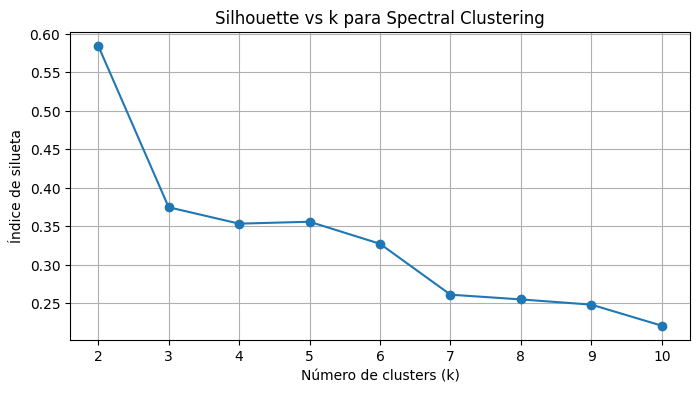


El n√∫mero √≥ptimo de clusters seg√∫n Spectral Clustering es: 2


In [22]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


range_n_clusters = list(range(2, 11))
silhouette_scores_spec = []


for k in range_n_clusters:
    spec = SpectralClustering(n_clusters=k, affinity='rbf', random_state=42)
    labels_spec = spec.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels_spec)
    silhouette_scores_spec.append(score)
    print(f"k = {k} ‚Üí silhouette = {score:.4f}")


plt.figure(figsize=(8, 4))
plt.plot(range_n_clusters, silhouette_scores_spec, marker='o')
plt.xlabel('N√∫mero de clusters (k)')
plt.ylabel('√çndice de silueta')
plt.title('Silhouette vs k para Spectral Clustering')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

# Selecci√≥n del mejor k
best_k_spec = range_n_clusters[silhouette_scores_spec.index(max(silhouette_scores_spec))]
print(f"\nEl n√∫mero √≥ptimo de clusters seg√∫n Spectral Clustering es: {best_k_spec}")


## Spectral Clustering con k = 2

En base al √≠ndice de silueta, el valor √≥ptimo de clusters para **Spectral Clustering** fue **k = 2**. A continuaci√≥n ajustamos el modelo con esta configuraci√≥n y analizamos:

1. El **tama√±o** de cada cluster.  
2. Las **medias** de las variables en escala original para caracterizar ambos grupos.  
3. La **lista de pa√≠ses** en cada cluster para identificar desarrollados y subdesarrollados.




In [23]:
from sklearn.cluster import SpectralClustering

spec = SpectralClustering(n_clusters=2, affinity='rbf', random_state=42)
spec_labels = spec.fit_predict(df_scaled)

df['spec_cluster'] = spec_labels


print("Tama√±o de cada cluster (Spectral):")
print(df['spec_cluster'].value_counts().sort_index(), "\n")


spec_means = df.groupby('spec_cluster').mean().round(2)
print("Medias de cada variable por cluster (Spectral):")
print(spec_means, "\n")


df_orig = pd.read_csv(path + "/Country-data.csv")
df_orig['spec_cluster'] = spec_labels

print("Pa√≠ses en Cluster 0 (posible subdesarrollo):")
print(df_orig.loc[df_orig['spec_cluster']==0, 'country'].values, "\n")

print("Pa√≠ses en Cluster 1 (posible desarrollo):")
print(df_orig.loc[df_orig['spec_cluster']==1, 'country'].values)


Tama√±o de cada cluster (Spectral):
spec_cluster
0    164
1      3
Name: count, dtype: int64 

Medias de cada variable por cluster (Spectral):
              child_mort  exports  health  imports    income  inflation  \
spec_cluster                                                              
0                  38.89    38.64    6.82    44.88  16286.97       7.88   
1                   4.13   176.00    6.79   156.67  64033.33       2.47   

              life_expec  total_fer      gdpp  cluster  agg_cluster  \
spec_cluster                                                          
0                  70.36       2.98  12148.26     0.75         0.01   
1                  81.43       1.38  57566.67     4.00         0.00   

              agg_cluster_avg  dbscan_cluster  
spec_cluster                                   
0                        0.01            0.48  
1                        0.00           -1.00   

Pa√≠ses en Cluster 0 (posible subdesarrollo):
['Afghanistan' 'Albania' 'Alger

Notemos que estos paises no se clasifican muy bien en la realidad con ** K = 2 **.

## Conclusi√≥n comparativa de los m√©todos de clustering

**1. KMeans (k = 5)**  
- **Silhouette ‚âà 0.30**, partici√≥n en cinco grupos bien diferenciados que reflejan:  
  - Pa√≠ses desarrollados (Clusters¬†1 y¬†4)  
  - Pa√≠ses en desarrollo (Cluster¬†0)  
  - Pa√≠ses subdesarrollados (Cluster¬†2)  
  - Outlier extremo (Cluster¬†3)  
- **Ventaja:** f√°cil ajuste de k con el √≠ndice de silueta y centroides interpretable en la escala original.  
- **Complejidad:** O(n¬∑k¬∑iteraciones), muy eficiente para n moderado y k peque√±o.

**2. Clustering Aglomerativo (single, k = 2)**  
- **Silhouette ‚âà 0.62**, segmenta n√≠tidamente un outlier (mortalidad e inflaci√≥n extremas) frente al resto.  
- √ötil para **detecci√≥n de casos extremos**, pero para m√°s clusters tiende a ‚Äúcadenas‚Äù por el enlace simple.  
- **Complejidad:** O(n¬≤)‚ÄìO(n¬≥) para el dendrograma, m√°s costoso que KMeans.

**3. DBSCAN (eps=1.5, min_samples=3)**  
- **Silhouette ‚âà 0.29**, encontr√≥ dos n√∫cleos densos (countries buenos vs. malos) y etiquet√≥ ~18‚ÄØ% como ruido.  
- **Ventaja:** no fuerza asignaci√≥n; destaca puntos menos densos sin definir clusters.  
- **Complejidad:** O(n¬∑log‚ÄØn) with spatial index, ideal para detectar outliers.

**4. Spectral Clustering (k = 2)**  
- **Silhouette ‚âà 0.58**, pero segreg√≥ solo 3 pa√≠ses (Luxembourg, Malta, Singapore) y agrup√≥ el resto indistintamente, fallando en reconocer correctamente muchas econom√≠as desarrolladas.  
- **Inconveniente:** desbalance extremo de tama√±os (164 vs. 3) y baja interpretabilidad de sus coeficientes espectrales.  
- **Complejidad:** O(n¬≥) por descomposici√≥n de la matriz Laplaciana, poco pr√°ctico para grandes n.




# **Conclusi√≥n final:**  
Para este dataset, **KMeans** con k=5 ofrece el balance ideal entre interpretabilidad, calidad de separaci√≥n y eficiencia computacional. **Aglomerativo** (single) resulta insuperable para aislar casos extremos cuando buscamos 2 clusters, y **DBSCAN** es excelente para identificar ruido. **Spectral Clustering**, aunque prometedor, no logra una clasificaci√≥n coherente en este escenario y tiene un coste computacional elevado.  